In [32]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import scipy.stats as stats

%matplotlib inline 
import matplotlib.pyplot as plt

import math
import statsmodels.api as sm            # for autocorrelation function
import os
import seaborn as sns
import astroabc
import ipynb
import random
import timeit

from ipynb.fs.full.import_data import get_data, get_station_name # Import data

# HJ Andrews 

In [33]:
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])
temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
temp[temp<0]=0
swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
sweb = swe/np.amax(swe)

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmel

# Define SDE

In [34]:
random.seed(10)

def sde(par):
    x = np.zeros(n)
    for i in range(n - 1):
        x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
        1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
    return (1/par[0]*par[2]*x)

In [35]:


dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

par = [0.5,1, 18000,0.05,0.05,0.01]

data1 = sde(par)  # test model

In [36]:
def dist_metric(d,x):
    return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
dist_metric(data1, discharge)

0.7776912726470246

In [6]:
priors =  [('uniform', [0.01,2]), ('uniform', [0.0,10]),('normal', [18000, 2000]),('uniform', [0.0,0.02]),('uniform', [0.0,0.02]),('uniform', [0.0,0.0001])]

In [7]:
prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':"HJA.txt", 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':20}

In [8]:
sampler = astroabc.ABC_class(6,100,discharge,[10,0.8],10000,priors,**prop)

	 	
	 ########################     astroABC     ########################	
	 	
	 Npart=100 	 numt=10000 	 tol=[10.0000,0.8000] exp
	 Priors= [('uniform', [0.01, 2]), ('uniform', [0.0, 10]), ('normal', [18000, 2000]), ('uniform', [0.0, 0.02]), ('uniform', [0.0, 0.02]), ('uniform', [0.0, 0.0001])]


<ipython-input-3-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-3-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-3-b947d1ba2a0c>:9: RuntimeWarning: overflow encountered in multiply
  return (1/par[0]*par[2]*x)
<ipython-input-5-badb0e4db0c5>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-3-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-3-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-3-b947d1ba2a0c>:9: RuntimeWarn

<ipython-input-5-badb0e4db0c5>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-3-b947d1ba2a0c>:7: RuntimeWarning: invalid value encountered in sqrt
  1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
<ipython-input-3-b947d1ba2a0c>:7: RuntimeWarning: invalid value encountered in sqrt
  1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
<ipython-input-3-b947d1ba2a0c>:7: RuntimeWarning: invalid value encountered in sqrt
  1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
<ipython-input-3-b947d1ba2a0c>:7: RuntimeWarning: invalid value encountered in sqrt
  1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
<ipython-input-3-b947d1ba2a0c>:8: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
<ipython-input-3-b947d1ba2a0c>:8: Ru

In [9]:
start = timeit.default_timer()
sampler.sample(sde)
stop = timeit.default_timer()

print('Time: ', stop - start)  

	 Step: 0 	 tol: 10.0 	 Params: [0.9751338263689635, 4.580471659224525, 17972.82785385786, 0.010629025360869404, 0.009511627530056055, 4.983110062436377e-05]
	 Step: 1 	 tol: 0.8940972532911493 	 Params: [1.4048617026861847, 4.182671719391104, 15772.904570727853, 0.012993857035141953, 0.010890377808517183, 6.0853965244336094e-05]
	 Step: 2 	 tol: 0.8 	 Params: [1.5702436918119915, 5.634757915449528, 15369.293875235086, 0.009787253827324469, 0.010523659325979689, 4.682669556595258e-05]
Time:  40.52967648091726


In [10]:
# import  samples
data = ("HJA.txt")
samples  =  pd.DataFrame(np.loadtxt('HJA.txt', skiprows=1))
samplespar = samples[samples.columns[0:6]]


<AxesSubplot:title={'center':'Sample traces'}>

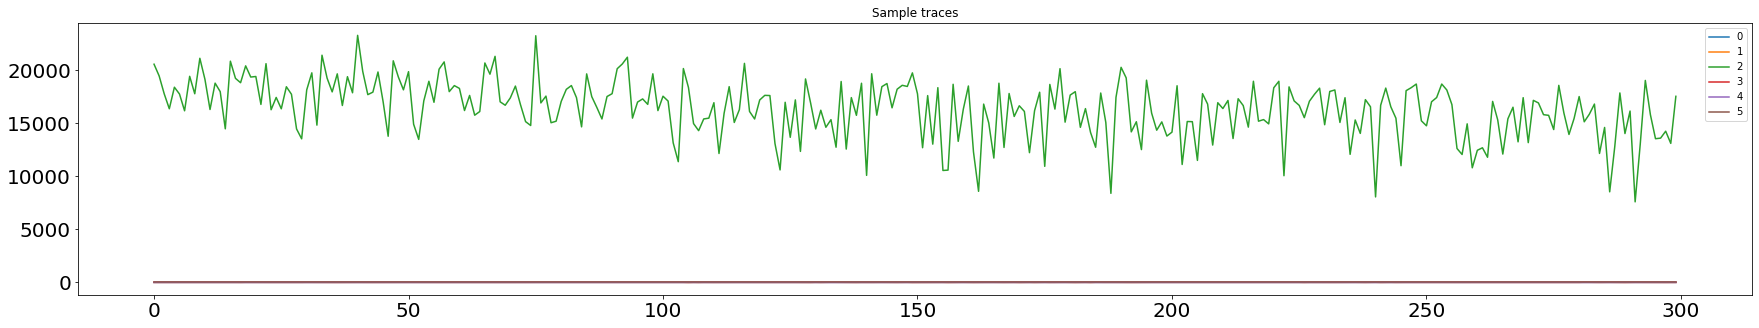

In [11]:
samplespar.plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Sample traces')
#samplespar.plot(kind='hist',y ='AMS_cdx', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')

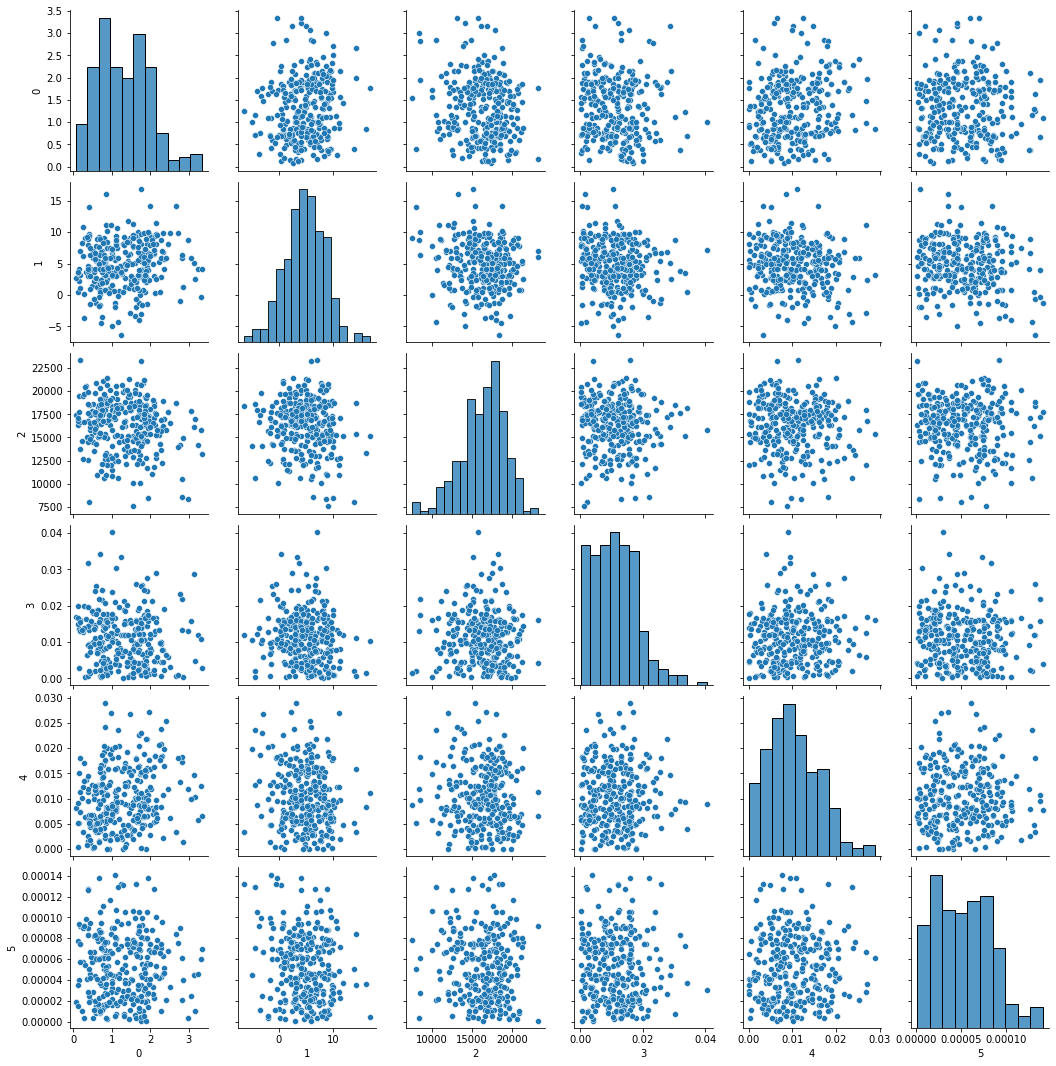

In [12]:
sns.pairplot(samplespar)

In [13]:
par = [np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),np.asarray(samplespar)[:,2].mean(),np.asarray(samplespar)[:,3].mean(),np.asarray(samplespar)[:,4].mean(),np.asarray(samplespar)[:,5].mean()]
#par = np.array(samplespar)[pd.read_csv(filepath_or_buffer=data, delimiter  =' ',header =0)["\t.1"].idxmax(),:]

In [14]:
par = np.array(samplespar)[samples[6].idxmin(),:]
par

array([6.19482000e-01, 8.84803400e+00, 1.09990823e+04, 6.94400000e-03,
       5.10700000e-03, 4.10000000e-05])

In [15]:
n =3000
x = np.zeros([n,500])


dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


for j in range(499):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt -1/par[0]*x[i,j]*dt + \
        1*(np.sqrt(par[3])*x[i,j]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
sim = 1/par[0]*par[2]*x

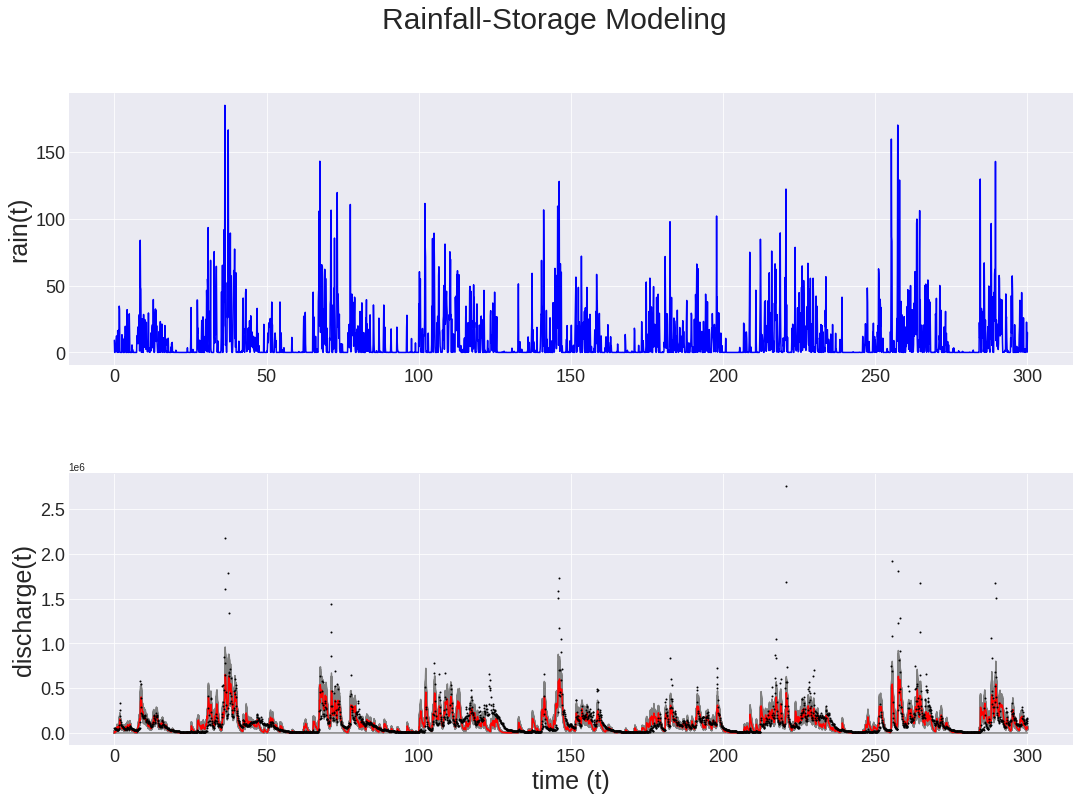

In [16]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test2.jpg',dpi = 150)

In [17]:
# With parametric uncertainty

par = np.array(samplespar)[np.random.randint(300,size =200)]
for j in range(199):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[j,1]*sweb[i]*temp[i]*dt -1/par[j,0]*x[i,j]*dt + \
        1*(np.sqrt(par[j,3])*x[i,j]+np.sqrt(par[j,4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[j,5])*np.random.lognormal(0,np.sqrt(dt),1)
sim = 1/par[j,0]*par[j,2]*x

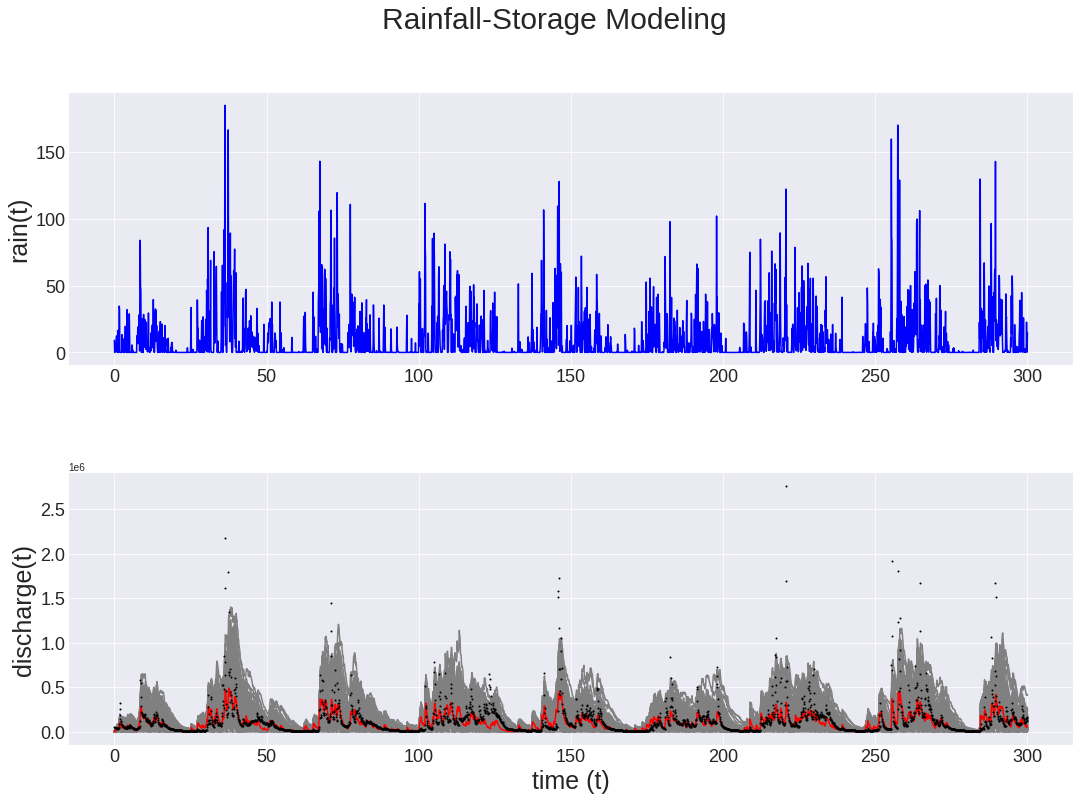

In [18]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test2.jpg',dpi = 150)

/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


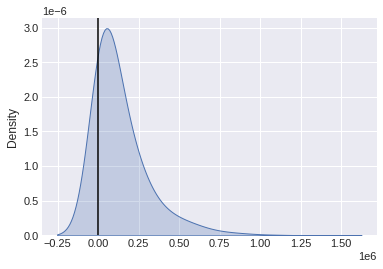

In [339]:
data = sim[:,1] #Generating data.
#plt.figure(figsize = (5,5))
sns.kdeplot(data , bw = 0.5 , fill = True)
plt.axvline(bb , 0,1, color = 'black')
plt.show()

In [19]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [3]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [362]:
save_folder = 'images/dynamicprob'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (15,5))
   sns_plot = sns.kdeplot(data , bw = 0.2 , fill = True)
   plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 1000000)
   plt.ylim(0, (25*10**(-6)))
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [20]:
for n in range(40):
    plot_phase(n)

NameError: name 'sim' is not defined

In [38]:
os.chdir('/home/waniomar/Office/Berkeley/Scripts/sde')

In [39]:
# load all the static images into a list
save_folder = '/images/dynamicprob'
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = '/images/animated-dynamicprob.gif'

In [30]:
# load all the static images into a list
save_folder = '/images/dynamicprob'
images = [Image.open(image) for image in glob.glob('home/waniomar/Office/Berkeley/Scripts/sde/images/dynamicprob/*.png')]
gif_filepath = 'home/waniomar/Office/Berkeley/Scripts/sde/images/animated-dynamicprob.gif'

In [40]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = 700 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

IndexError: list index out of range

In [391]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) 

True

In [291]:
#IPdisplay.Image(url=gif_filepath)